In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline
plt.style.use('default')
import seaborn as sns

# Loading the Dataset

In [8]:
df=pd.read_csv('SampleSuperstore.csv')

In [9]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Check Datatypes

In [10]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

The datatypes seem to be correctly assigned.

# Check Shape

In [11]:
df.shape

(9994, 13)

# Data Cleaning

## Checking for missing values

In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null or NaN values in our dataset.

## Handling Duplicates

In this analysis, we have chosen not to remove duplicate entries from the dataset. Duplicates may exist in the data, and we have decided to keep them for the following reasons:

- Duplicates are expected in this context and represent legitimate data points.
- Our analysis goals do not require eliminating duplicates; we are working with the entire dataset as-is.
- Removing duplicates could potentially skew our results or lead to data loss, given the nature of the analysis.

## Check Unique values

In [13]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

There is only 1 unique value for the Country column.This means this entire dataset is of that particular country.
So its okay to drop this column as it will not add any value to our analysis.

### Dropping the Country column

In [14]:
df=df.drop(['Country'], axis=1)

In [15]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Correlation Analysis

<AxesSubplot:>

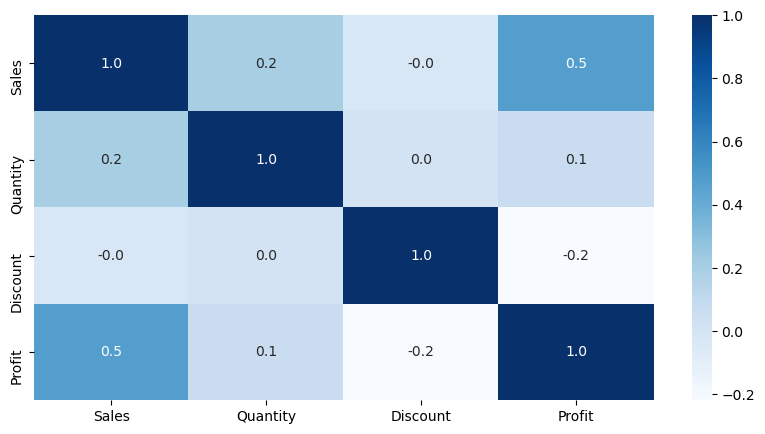

In [16]:
#Checking the corelations between numeric columns
df_con=df.select_dtypes(include=[np.number]) #getting the numerical features
column_to_exclude = 'Postal Code'
if column_to_exclude in df_con:
    df_con = df_con.drop(columns=[column_to_exclude])
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_con.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="Blues") 

Although a miniscule correalation is observed between **Sales and Profit**,<br> no other such strong correlations are observed!

## Outlier Detection

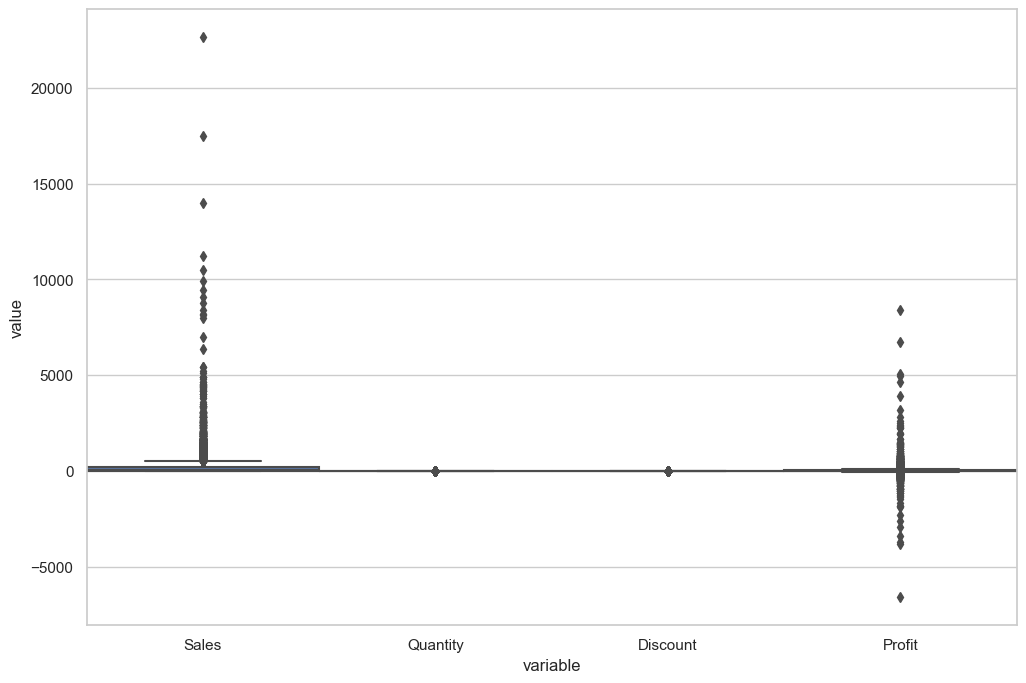

In [17]:
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)

plt.show()

From the above plot, it can be concluded that outliers exist in Sales and Profit columns.<br> As it's a large data set, we can remove those rows containing outliers to improve our results.

## Removing Outliers

In [18]:
def remove_outliers(df, k=3.33):
    cleaned_df = df.copy()
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if not df[col].empty:
            mean = df[col].mean()
            std = df[col].std()
            lower_bound = mean - k * std
            upper_bound = mean + k * std
            cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    
    return cleaned_df


In [19]:
cleaned_df=remove_outliers(df)

Let us check whether the outliers have been removed or not.

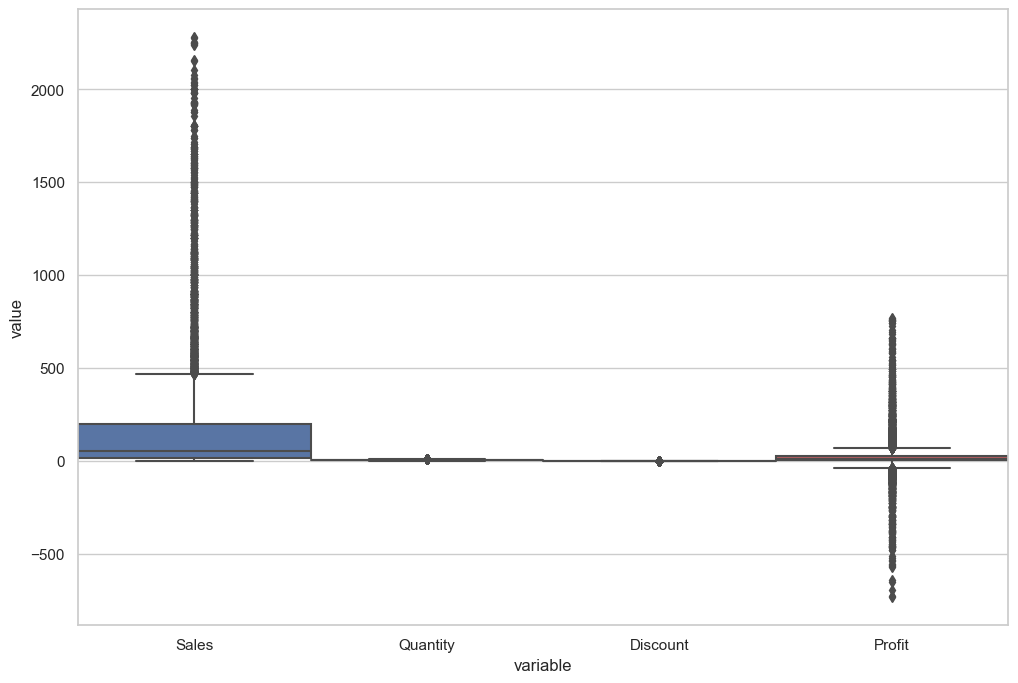

In [20]:
ds_con=cleaned_df.select_dtypes(include=[np.number]) #numerical values
column_to_exclude = 'Postal Code'
if column_to_exclude in ds_con:
    ds_con = ds_con.drop(columns=[column_to_exclude])

plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)

plt.show()

In [21]:
cleaned_df.shape

(9776, 12)

# Descriptive Statistics

In [22]:
cleaned_df.iloc[:,5:].describe() #Excluded the Postal Code column

,Sales,Quantity,Discount,Profit
count,9776.000000,9776.000000,9776.000000,9776.000000
mean,177.353140,3.686375,0.155377,21.870253
std,300.721412,2.056949,0.205515,86.844661
min,0.444000,1.000000,0.000000,-734.526400
25%,16.749000,2.000000,0.000000,1.725850
50%,51.535000,3.000000,0.200000,8.399100
75%,196.492500,5.000000,0.200000,28.003200
max,2279.960000,11.000000,0.800000,767.200500


### Statistical Summary

1.The average sale amount per transaction is approximately **&#36;177.40** and a normal standard deviation of **&#36;300.72** indicates less variability in transaction amounts.

2.On average, **3 products** are sold per transaction and also a **standard deviation of 2.05** indicates variability in the number of products per transaction.<br>
The retail store has sold a maximum of **11 products** in one transaction.

3.On average, a discount of approximately **15.5%** is applied to transactions.<br> 
**80%** was the largest discount that was applied to a particular transaction.

4.On average, each transaction results in a profit of approximately **&#36;22**.<br>
The smallest profit recorded is approximately **-&#36;734.52**, indicating that some transactions resulted in **losses**, while the largest profit is approximately **&#36;767.20**.

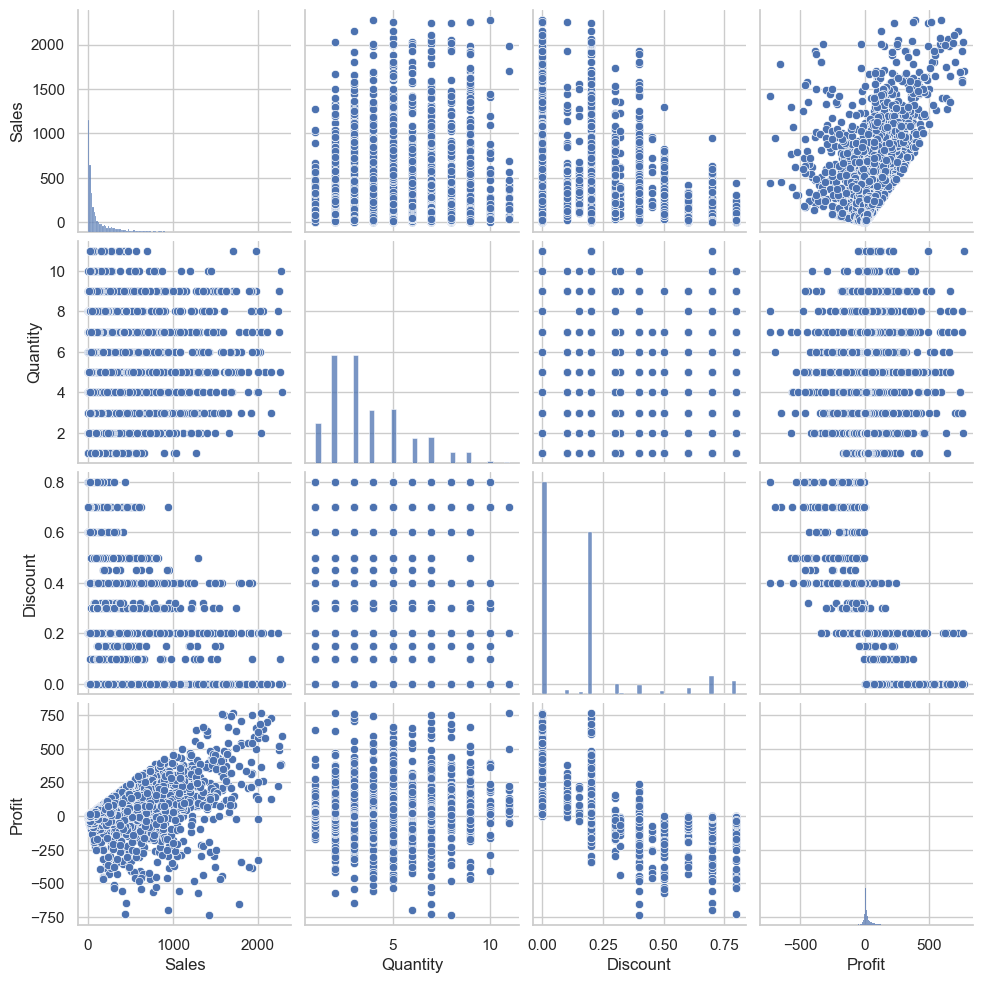

In [23]:
sns.pairplot(ds_con)

No strong linear relations observed.Data is irregular throughout!

# Distribution of Categorical Features<br> (ship mode,segment,category)

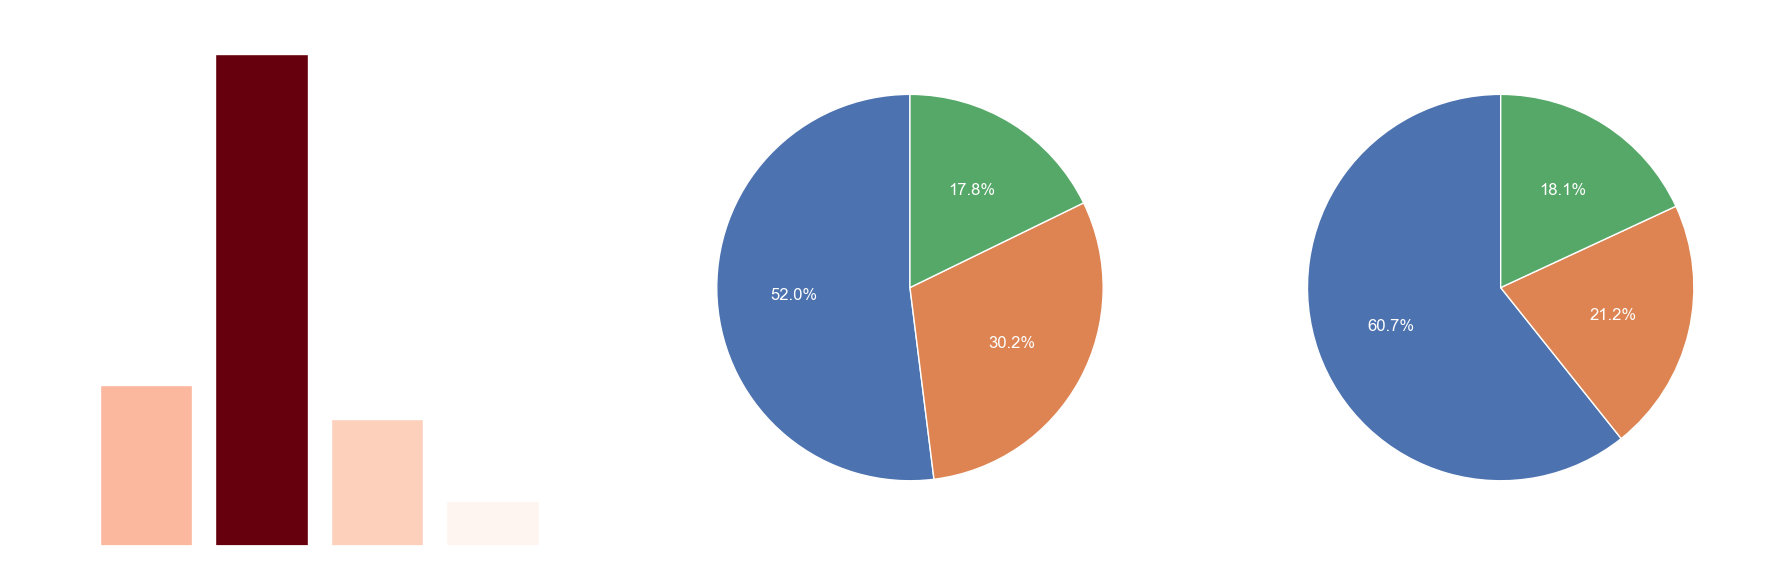

In [24]:
ship_mode_counts = cleaned_df['Ship Mode'].value_counts(sort=False)

# Create a colormap with different shades of red
ship_mode_colormap = plt.get_cmap('Reds')

# Normalize the counts to the [0, 1] range
ship_mode_normalize = plt.Normalize(vmin=ship_mode_counts.min(), vmax=ship_mode_counts.max())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),facecolor='none')

# Bar Chart for 'Ship Mode' Count
bars = ax1.bar(ship_mode_counts.index, ship_mode_counts, color=ship_mode_colormap(ship_mode_normalize(ship_mode_counts)))
ax1.set_ylabel('Count',color='white')
ax1.set_title('Ship Mode',color='white')
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)
ax1.set_facecolor('none')
fig.patch.set_facecolor('none')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['bottom'].set_color('white')

# Add count values on top of each bar
for bar, count in zip(bars, ship_mode_counts):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom',color='white')
# Get the value counts for the 'Segment' column
segment_counts = cleaned_df['Segment'].value_counts()

# Create a pie chart for 'Segment' Count
ax2.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90,textprops={'color': 'white'})
ax2.set_title('Segment',color='white')

# Get the value counts for the 'Category' column
category_counts = cleaned_df['Category'].value_counts()

# Create a pie chart for 'Category' Count
ax3.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90,textprops={'color': 'white'})
ax3.set_title('Category',color='white')

# Show the plot
plt.tight_layout()
plt.show()


1.The majority of customers prefer **"Standard Class"** shipping mode and customers tend to avoid **"Same Day"** shipping mode, which may be due to its higher cost or less frequent availability.<br>

2.1. **52%** of the customer base is **"Consumer"**.This indicates that the general public or individual consumers represent the largest customer group for the store.<br>2.2.The fact that the **"Consumer"** segment is the most prominent does not necessarily mean that the other segments are less important. While **"Consumer"** dominates, **"Home Office"** and **"Corporate"** segments still contribute significantly to the customer base, with **17.8%** and **30.2%**, respectively. This diversity in customer segments suggests a well-rounded customer base.<br>

3.1.**"Office Supplies"** is the most significant product category, accounting for **60.7%** of the total. This indicates that office supplies are a popular and essential product category for the business.<br>3.2.While **"Office Supplies"** is the dominant category, the business has a diversified product portfolio that includes **"Furniture"** and **"Technology"** categories. This diversity suggests that the store can cater to a wide range of customer needs and preferences.


# Category/Sub-Category Analysis

In [59]:
cleaned_df = cleaned_df.reset_index().drop('index', axis=1, errors='ignore')
cleaned_df.columns = [str(c) for c in cleaned_df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	cleaned_df['Category'],
	cleaned_df['Sales'],
	cleaned_df['Profit'],
], axis=1)
chart_data = chart_data.sort_values(['Category'])
chart_data = chart_data.rename(columns={'Category': 'x'})
chart_data_sum = chart_data.groupby(['x'], dropna=True)[['Sales', 'Profit']].sum()
chart_data_sum.columns = ['Sales|sum','Profit|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['Sales|sum'],
	name='Sales',
    text=chart_data['Sales|sum'].apply(lambda x: f'{x / 1000:.3f}K'),  # Use the Sales|sum column for data labels
    textposition='inside',
))
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['Profit|sum'],
	name='Profit',
    text=chart_data['Profit|sum'].apply(lambda x: f'{x / 1000:.3f}K'),  # Use the Sales|sum column for data labels
    textposition='outside',
    textfont=dict(color="white"),
))
figure1 = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'x': 1, 'y': 1,'bgcolor': 'rgba(0,0,0,0)'},
    'title': {'text': 'Sales & Profit by Category'},
    'xaxis': {'title': {'text': 'Category'}},
    'yaxis': {'type': 'linear'},
    'plot_bgcolor': 'rgba(0,0,0,0)',  # Set the plot background color to transparent
    'paper_bgcolor':'rgba(0,0,0,0)',
    'xaxis_showgrid': False,  # Hide the x-axis gridlines
    'yaxis_showgrid': False, # Hide the y-axis gridlines
    'bargap':0.4,
    'height':480
}))

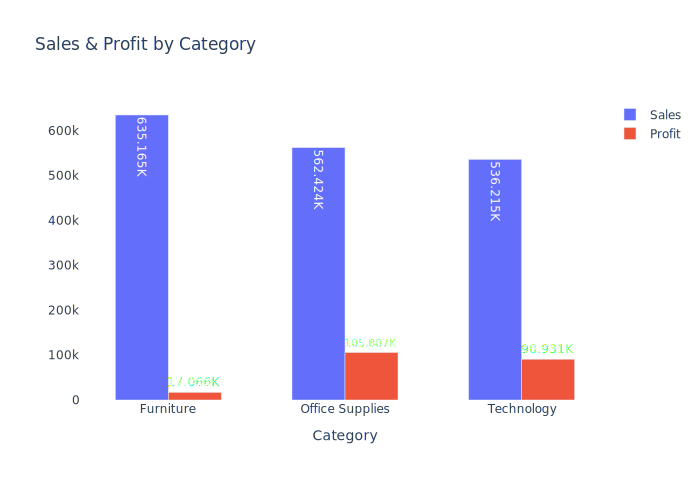

In [61]:
figure1.show()

Even though the sales of Furniture is the **highest** at **&#36;635K** approximately,the profit made by Furniture is very **low** at **&#36;17K**.<br> This indicates Furniture is a low profit-margin category(2.68%).<br>
The sales of Office Supplies is **lower** than Furniture at **&#36;562k** approximately,but it has the highest profit margin as this category made the highest profit of **&#36;105K** approximately.<br>
**Problems Solved**:<br>
**1.Resource Allocation**: Allocate resources like marketing effort,budget etc. in accordance to their sales and profitability.For Eg: Focusing resources on **Office Supplies and Technology.<br>
2.Price Optimizations**: Adjust pricing strategy of sub-categories in accordance to their sales and profitability.For Eg:Provide discounts on categories like **Office Supplies and Technology.**<br>
**3.Cost Management**: Optimize production, sourcing, and supply chain processes to reduce costs and improve margins on low profit-margin category(**Furniture**).<br>
**4.Inventory Management**: Reduce the inventory levels for sub-categories with low sales and profit-margin,and keep abundant stocks for sub-categories with high sales and profit-margin.

In [27]:
chart_data = pd.concat([
	cleaned_df['Sub-Category'],
	cleaned_df['Sales'],
], axis=1)
chart_data = chart_data.sort_values(['Sub-Category'])
chart_data = chart_data.rename(columns={'Sub-Category': 'x'})
chart_data_sum = chart_data.groupby(['x'], dropna=True)[['Sales']].sum()
chart_data_sum.columns = ['Sales|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data.sort_values(['Sales|sum'], ascending=False).head(5)

charts = []
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['Sales|sum'],
    text=chart_data['Sales|sum'].apply(lambda x: f'{x / 1000:.3f}K'),  # Use the Sales|sum column for data labels
    textposition='inside',# Position the data labels outside the bars
    
))

figure2 = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'title': {'text': 'Sum of Sales by Sub-Category'},
    'xaxis': {'title': {'text': 'Sub-Category'}},
    'yaxis': {'title': {'text': 'Sum of Sales'}, 'type': 'linear'}
}))

In [28]:
chart_data = pd.concat([
	cleaned_df['Sub-Category'],
	cleaned_df['Profit'],
], axis=1)
chart_data = chart_data.sort_values(['Sub-Category'])
chart_data = chart_data.rename(columns={'Sub-Category': 'x'})
chart_data_sum = chart_data.groupby(['x'], dropna=True)[['Profit']].sum()
chart_data_sum.columns = ['Profit|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data.sort_values(['Profit|sum'], ascending=False).head(5)

charts = []
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['Profit|sum'],
    text=chart_data['Profit|sum'].apply(lambda x: f'{x / 1000:.3f}K'),  # Use the Profit|sum column for data labels
    textposition='inside',# Position the data labels inside the bars
    
))

figure3 = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'title': {'text': 'Sum of Profit by Sub-Category'},
    'xaxis': {'title': {'text': 'Sub-Category'}},
    'yaxis': {'title': {'text': 'Sum of Profit'}, 'type': 'linear'}
}))

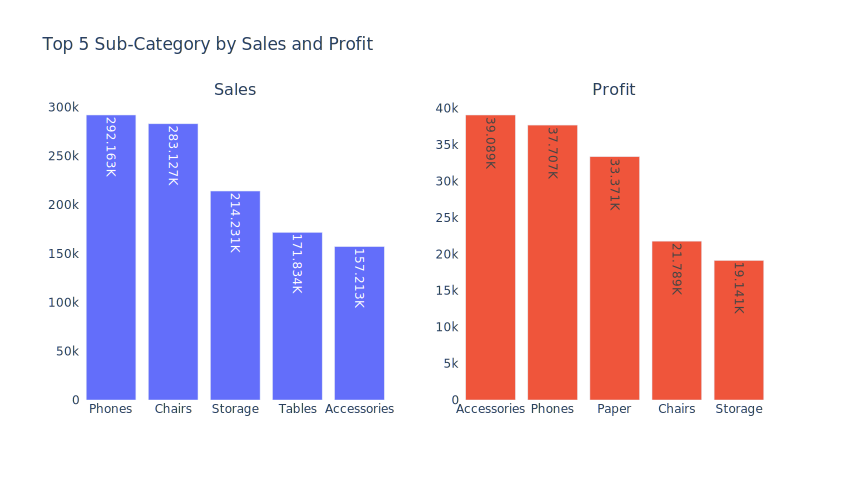

In [29]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=["Sales", "Profit"])

# Add the Sales and Profit charts to the subplot
fig.add_trace(figure2.data[0], row=1, col=1)
fig.add_trace(figure3.data[0], row=1, col=2)

# Update subplot layout
fig.update_layout(title_text="Top 5 Sub-Category by Sales and Profit", width=850,height=480,showlegend=False,plot_bgcolor='rgba(0,0,0,0)',  # Make the plot background transparent
    paper_bgcolor='rgba(0,0,0,0)')

# Remove gridlines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the combined chart
fig.show()

**Phones,Chairs and Accessories** are performing well in terms of both sales and profitability.<br>
The sales performance of **Storage and Tables** is commendable; however, the store is not generating sufficient profit from these products.<br>
**Problems Solved**:<br>
**1.Resource Allocation**: Allocate resources like marketing effort,budget etc. in accordance to their sales and profitability.For Eg: Focusing resources on products like **Phones,Chairs and Accessories**.<br>
**2.Price Optimizations**: Adjust pricing strategy of sub-categories in accordance to their sales and profitability.For Eg: Provide discounts on products like **Phones,Chairs and Accessories**<br>
**3.Cost Management**: Optimize production, sourcing, and supply chain processes to reduce costs and improve margins on low profit-margin sub-categories(**Storage and Tables**).<br>
**4.Inventory Management**: Reduce the inventory levels for sub-categories with low sales and profit-margin,and keep abundant stocks for sub-categories with high sales and profit-margin.

### Discount Analysis

In [30]:
chart_data = pd.concat([
	cleaned_df['Category'],
	cleaned_df['Discount'],
], axis=1)
chart_data = chart_data.sort_values(['Category'])
chart_data = chart_data.rename(columns={'Category': 'x'})
chart_data_sum = chart_data.groupby(['x'], dropna=True)[['Discount']].sum()
chart_data_sum.columns = ['Discount|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['Discount|sum'] > 0]  # can't represent negatives in a pie


chart = go.Pie(labels=chart_data['x'],values=chart_data['Discount|sum'])
figure4 = go.Figure(data=[chart], layout=go.Layout({
    'legend': {'x': 1, 'y': 1,'bgcolor': 'rgba(0,0,0,0)'}, 
    'title': {'text': 'Discount by Category'},
    'height':400,
    'width':700
}))

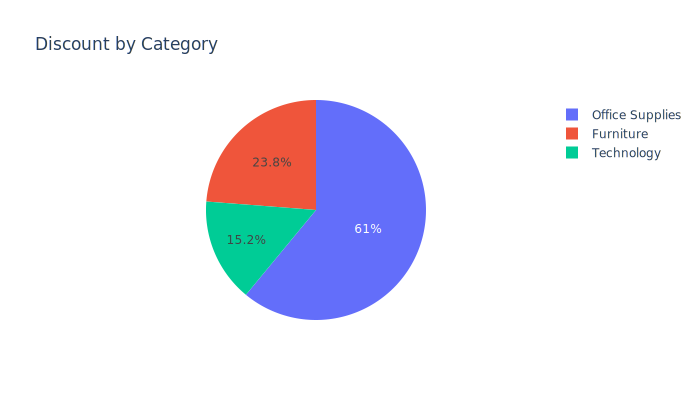

In [51]:
figure4.update_layout(paper_bgcolor='rgba(0,0,0,0)')
figure4.show()

A significant proportion of the total discounts, specifically **61%**, are allocated to the **Office Supplies** category. This approach appears to be a sound strategy, given the category's substantial sales volume and profitability.

# Sales/Profit analysis

### State/City distribution

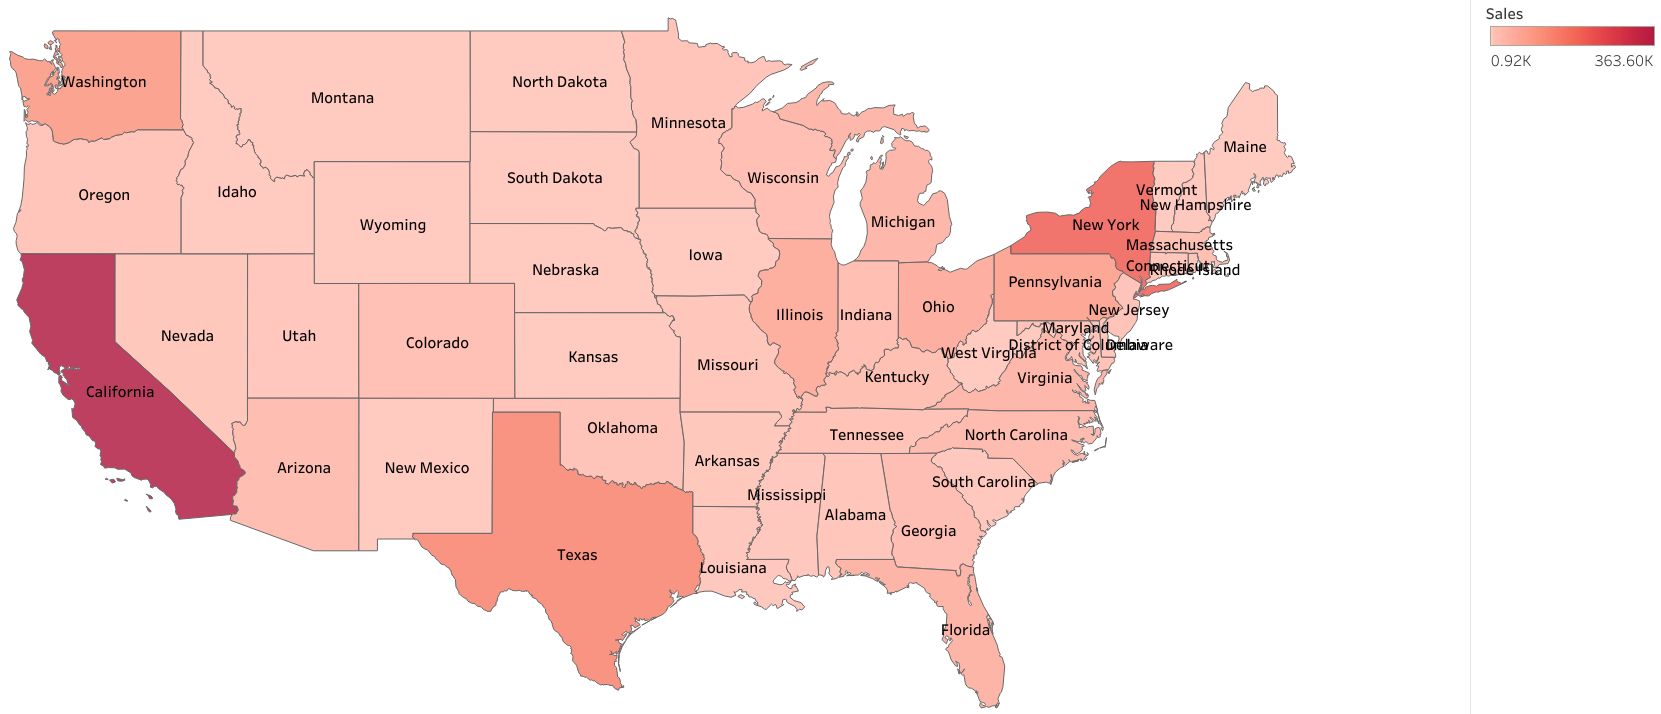

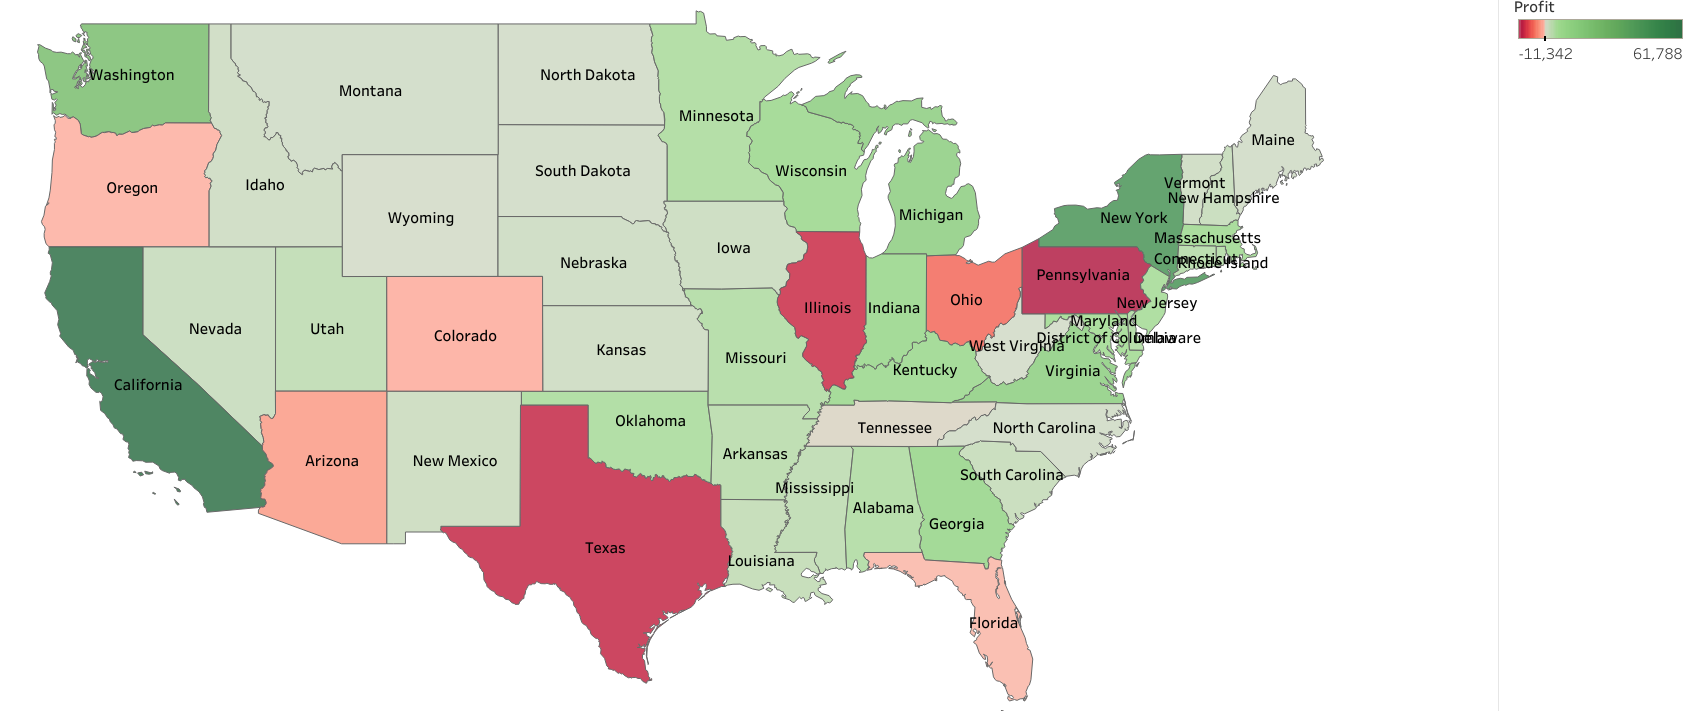

In [52]:
chart_data = pd.concat([
	cleaned_df['State'],
	cleaned_df['Sales'],
	cleaned_df['Profit'],
], axis=1)
chart_data = chart_data.sort_values(['State'])
chart_data = chart_data.rename(columns={'State': 'x'})
chart_data_sum = chart_data.groupby(['x'], dropna=True)[['Sales', 'Profit']].sum()
chart_data_sum.columns = ['Sales|sum','Profit|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data.sort_values('Sales|sum', ascending=False).head(5)

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['Sales|sum'],
	name='Sales',
    text=chart_data['Sales|sum'].apply(lambda x: f'{x / 1000:.3f}K'),  # Use the Sales|sum column for data labels
    textposition='outside',
))
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['Profit|sum'],
	name='Profit',
    text=chart_data['Profit|sum'].apply(lambda x: f'{x / 1000:.3f}K'),  # Use the Sales|sum column for data labels
    textposition='outside',
))
figure5 = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'x': 1, 'y': 1,'bgcolor': 'rgba(0,0,0,0)'},
    'title': {'text': 'Top 5 States by Sales(corresponding Profit)'},
    'xaxis': {'nticks': 49, 'tickmode': 'auto'},
    'yaxis': {'type': 'linear'},
    'plot_bgcolor': 'rgba(0,0,0,0)',  # Set the plot background color to transparent
    'xaxis_showgrid': False,  # Hide the x-axis gridlines
    'yaxis_showgrid': False, # Hide the y-axis gridlines
    'height':480,
    'paper_bgcolor':'rgba(0,0,0,0)'
}))

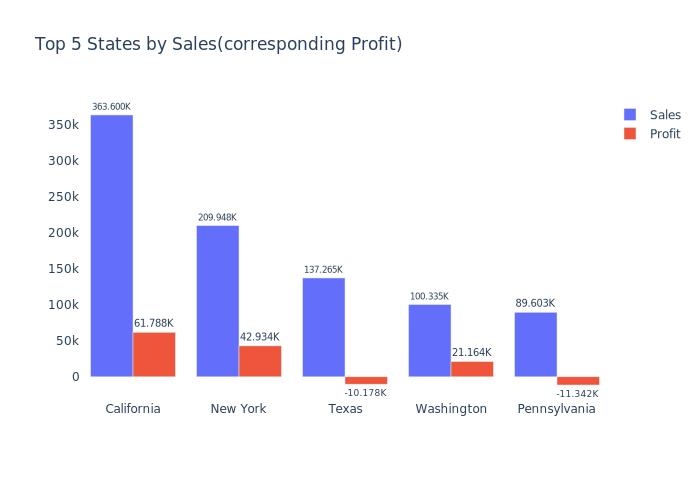

In [53]:
figure5.show()

Business from **California,New York,Washington** is performing well, exhibiting positive results in terms of sales and profitability..<br>
However, the profitability in **Texas and Pennsylvania** is not satisfactory.<br>
This suggests that a significant portion of transactions from these states, particularly in the low-profit margin category of **furniture**, are contributing to the overall negative profitability.<br>
**Problems Solved**:<br>
**1.Market Analysis**: Tailor marketing, sales, and product strategies to meet the unique needs and demands of these high-performing states(**California,New York,Washington**).<br>
**2.Resource Allocation**: Optimized resource allocation ensures the most return on investment in high-performing regions.<br>
**3.Customer Segmentation**:Segment customer base and target specific products and marketing campaigns to different customer groups in various states.High-performing states may have unique customer demographics and preferences. 
**4.Expansion and Growth Strategy**: Make informed decisions about opening new stores, or expanding operations in high-performing states(**California,New York,Washington**).

In [57]:
chart_data = pd.concat([
	cleaned_df['City'],
	cleaned_df['Sales'],
	cleaned_df['Profit'],
], axis=1)
chart_data = chart_data.sort_values(['City'])
chart_data = chart_data.rename(columns={'City': 'x'})
chart_data_sum = chart_data.groupby(['x'], dropna=True)[['Sales', 'Profit']].sum()
chart_data_sum.columns = ['Sales|sum','Profit|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data.sort_values('Sales|sum', ascending=False).head(5)

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['Sales|sum'],
	name='Sales',
    text=chart_data['Sales|sum'].apply(lambda x: f'{x / 1000:.3f}K'),  # Use the Sales|sum column for data labels
    textposition='outside',
))
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['Profit|sum'],
	name='Profit',
    text=chart_data['Profit|sum'].apply(lambda x: f'{x / 1000:.3f}K'),  # Use the Sales|sum column for data labels
    textposition='outside',
))
figure6 = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'x': 1, 'y': 1,'bgcolor': 'rgba(0,0,0,0)'},
    'title': {'text': 'Top 5 Cities by Sales(corresponding Profit)'},
    'xaxis': {'nticks': 49, 'tickmode': 'auto'},
    'yaxis': {'type': 'linear'},
    'plot_bgcolor': 'rgba(0,0,0,0)',  # Set the plot background color to transparent
    'paper_bgcolor':'rgba(0,0,0,0)',
    'xaxis_showgrid': False,  # Hide the x-axis gridlines
    'yaxis_showgrid': False, # Hide the y-axis gridlines
    'height':480
}))

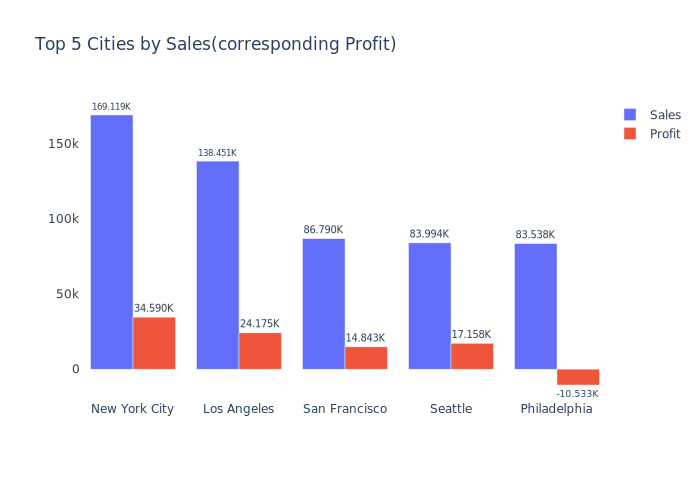

In [58]:
figure6.show()

### Segment and Regional distribution

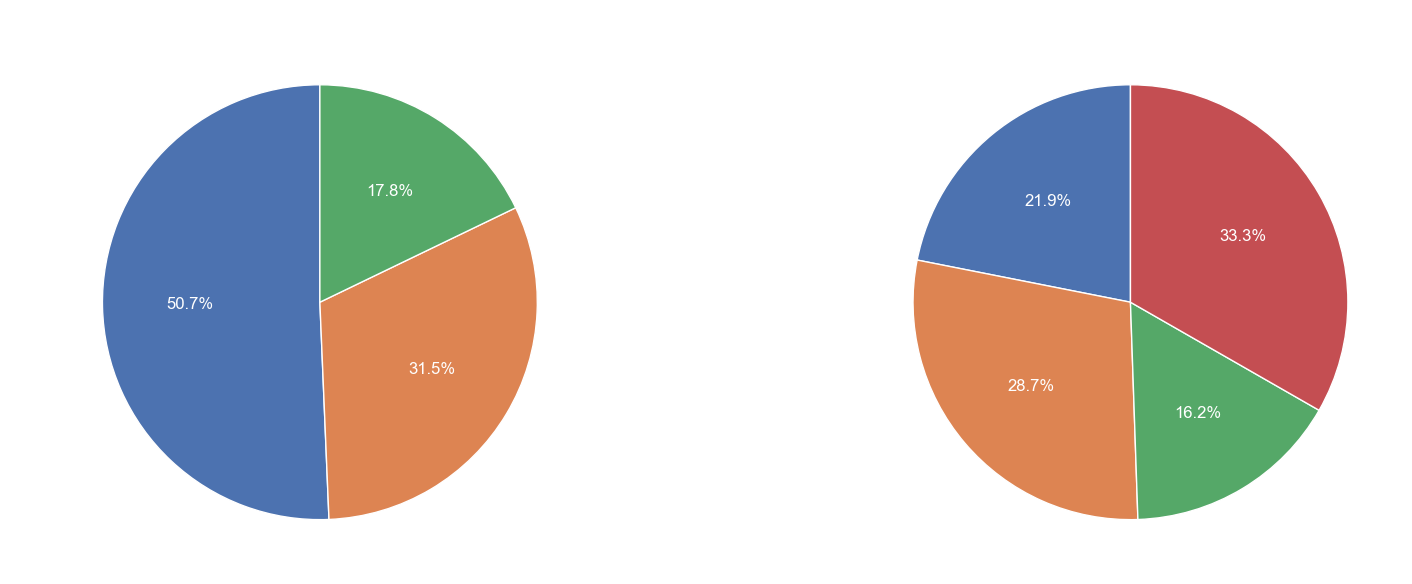

In [36]:
segment_sales = cleaned_df.groupby('Segment')['Sales'].sum()
region_sales = cleaned_df.groupby('Region')['Sales'].sum()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6),facecolor='none')

# First pie chart (Sales by Segment)
ax1.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=90,textprops={'color': 'white'})
ax1.set_title('Sales by Segment',color='white')

# Second pie chart (Sales by Region)
ax2.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90,textprops={'color': 'white'})
ax2.set_title('Sales by Region',color='white')

# Adjust the layout
plt.tight_layout()

# Show the pie charts
plt.show()



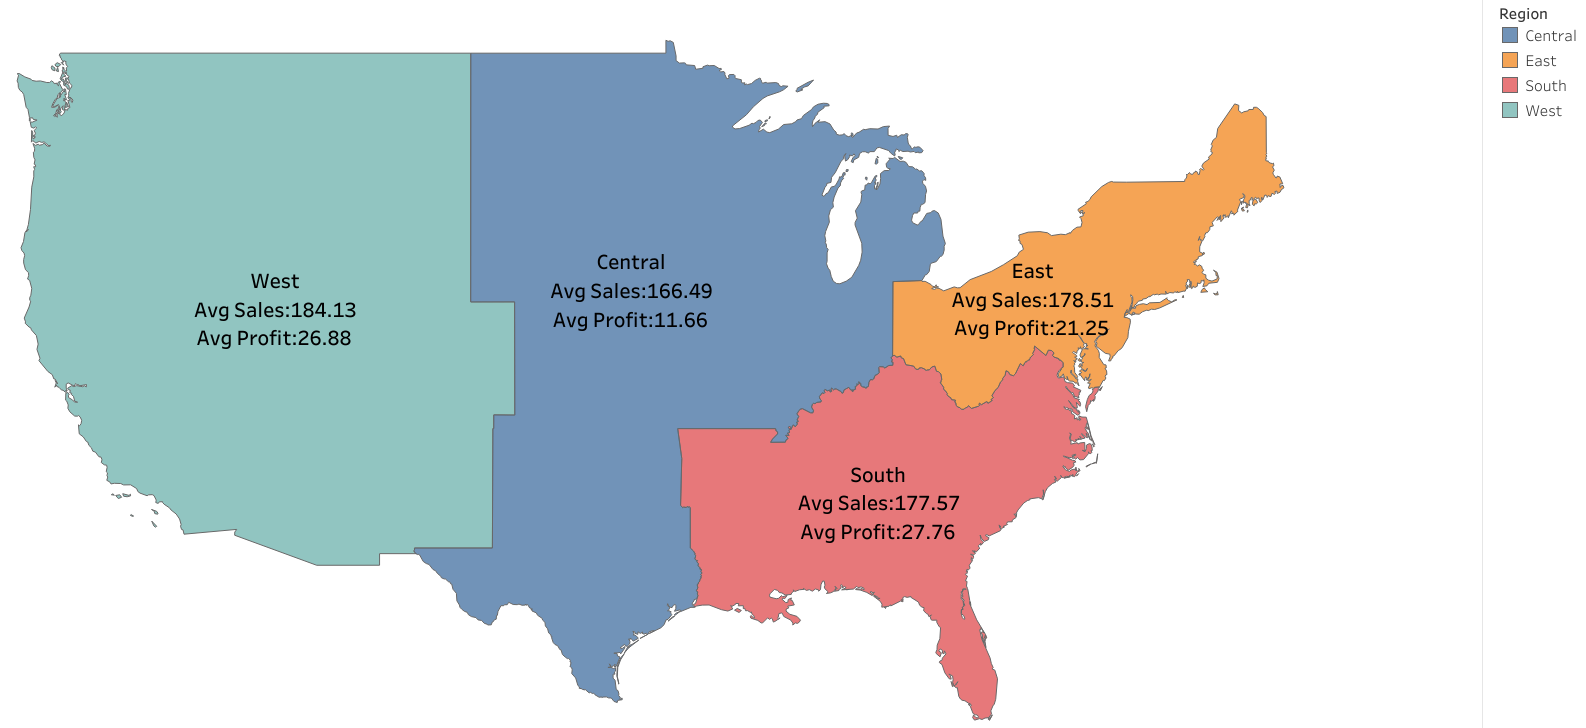

Although individual **consumers** account for 50% of the business, the **corporate** segment also plays a significant role in contributing to the store's overall sales, representing 31%.
The sales across Central(21.9%),East(28.7%),West(33.3%) regions are quite evenly distributed.<br>
**Problems Solved**:<br>
**1.Segmentation and Expansion**: Choosing where to expand operations, open new stores, or target marketing efforts to tap into new markets effectively.For Eg: Stakeholders launching marketing campaigns with a focus on their primary customer base, which consists of both individual **consumers and corporate** clients.<br>
**2.Inventory Management and Supply Chain**: Understanding the sales dynamics, can ensure adequate inventory levels and smooth supply chain operations in high-demand regions(**West and East**).



